### Problem Statement

The objective of this project is to analyze the Titanic passenger dataset to identify the key factors that influenced survival and to build machine learning models that predict whether a passenger survived the disaster based on demographic, socio-economic, and cabin-related features.

In [786]:
import pandas as pd 
import numpy as np

#### Data Loading

In [ ]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df  = pd.read_csv("/kaggle/input/titanic/test.csv")

#### Exploratory Data Analysis

In [788]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [789]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [790]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [791]:
train_df.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [792]:
test_df.isna().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [793]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

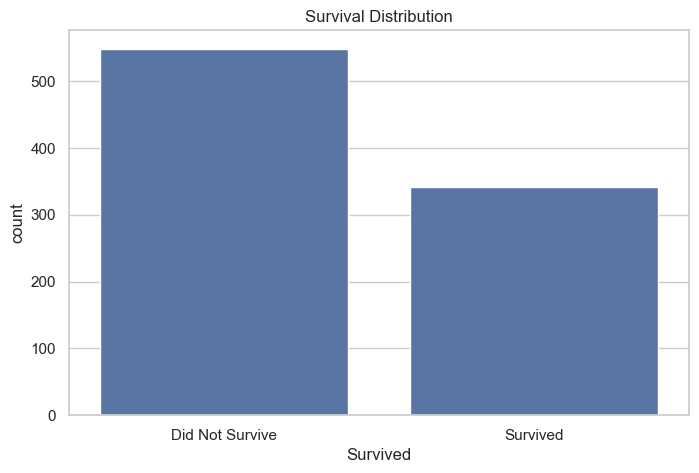

In [794]:
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Distribution")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.show()

Conclusion : Dataset is imbalanced (~62% did not survive).

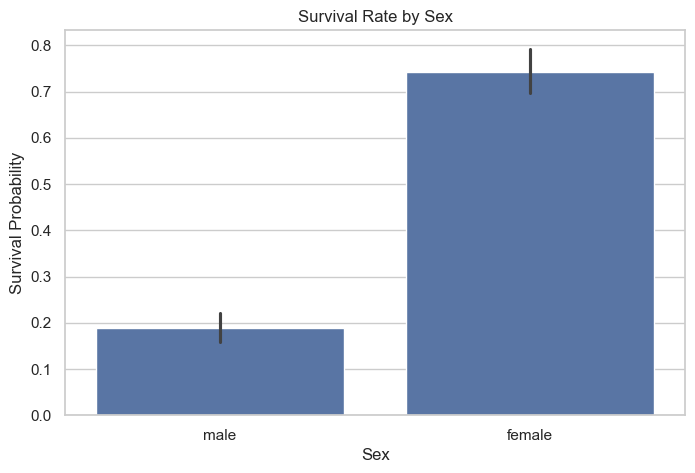

In [795]:
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Probability")
plt.show()


Conclusion : Females have more survival rate 

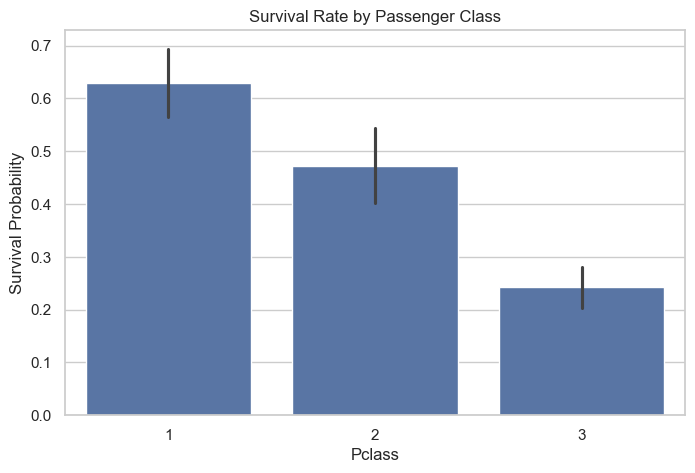

In [796]:
sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Probability")
plt.show()

Conclusion :  Survival rates dropped consistently across lower passenger classes.

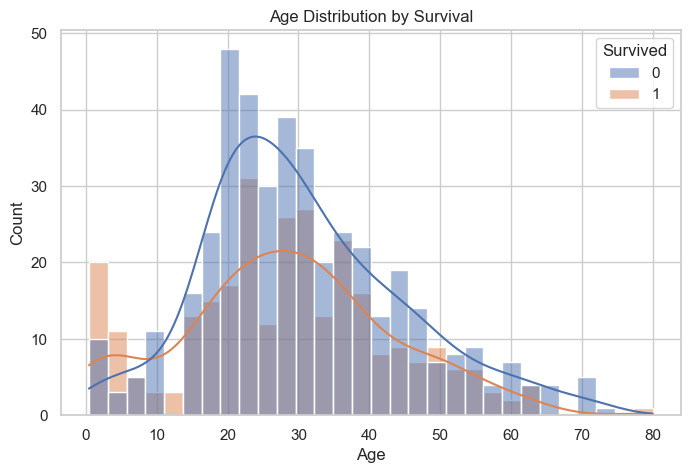

In [797]:
sns.histplot(data=train_df, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


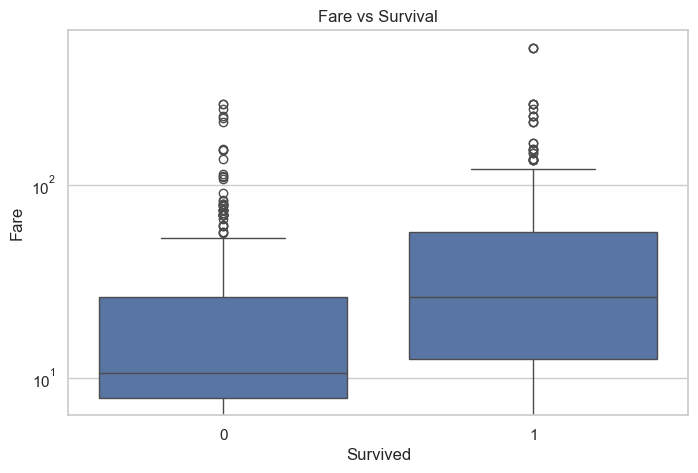

In [798]:
sns.boxplot(x="Survived", y="Fare", data=train_df)
plt.yscale("log")
plt.title("Fare vs Survival")
plt.show()

Conclusion: Passenger survival was heavily influenced by socioeconomic status, with higher fares offering better access to lifeboats

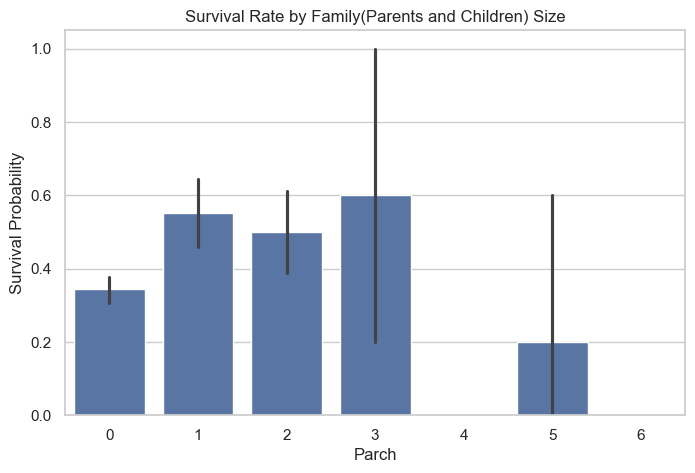

In [799]:
sns.barplot(x="Parch", y="Survived", data=train_df)
plt.title("Survival Rate by Family(Parents and Children) Size")
plt.ylabel("Survival Probability")
plt.show()

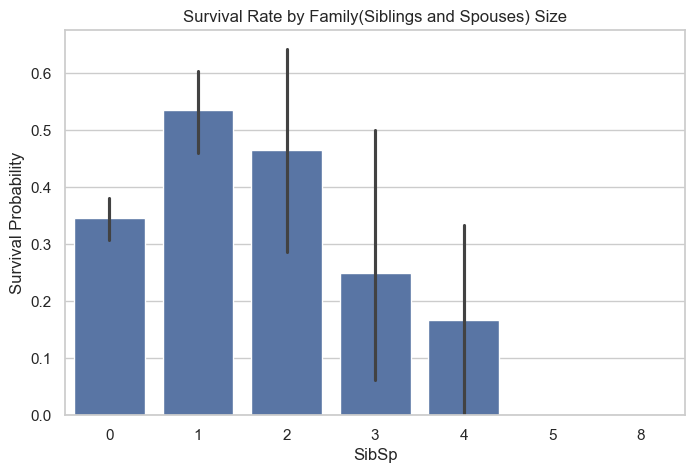

In [800]:
sns.barplot(x="SibSp", y="Survived", data=train_df)
plt.title("Survival Rate by Family(Siblings and Spouses) Size")
plt.ylabel("Survival Probability")
plt.show()

#### Data Preprocessing 

In [801]:
train_df['Age']=train_df['Age'].replace(np.nan,train_df['Age'].median())
test_df['Age']=test_df['Age'].replace(np.nan,test_df['Age'].median())

In [802]:
test_df['Fare']=test_df['Fare'].replace(np.nan,test_df['Fare'].median())

In [803]:
train_df['Embarked']=train_df['Embarked'].replace(np.nan,train_df['Embarked'].mode)

In [804]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [805]:
test_df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [806]:
train_df["Deck"] = train_df["Cabin"].str[0] #All that matters in Cabin is deck 
train_df['Deck']=train_df['Deck'].replace(np.nan,"UNKNOWN")#As cabin has many missing values (almost 70% +) So, lets leave the missing values "UNKNOWN"
test_df["Deck"] = test_df["Cabin"].str[0] 
test_df['Deck']=test_df['Deck'].replace(np.nan,"UNKNOWN")

In [807]:
train_df['Deck'].unique()

array(['UNKNOWN', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [808]:
train_df.drop(columns=['Cabin'],inplace=True)
test_df.drop(columns=['Cabin'],inplace=True)

In [809]:
train_df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [810]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Deck           0
dtype: int64

In [811]:
train_df.drop(columns=["Name"], inplace=True)
train_df.drop(columns=["Ticket"], inplace=True)

test_df.drop(columns=["Name"], inplace=True)
test_df.drop(columns=["Ticket"], inplace=True)

In [812]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,male,22.0,1,0,7.2500,S,UNKNOWN
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,UNKNOWN
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,UNKNOWN


In [813]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', <bound method Series.mode of 0      S
                      1      C
                      2      S
                      3      S
                      4      S
                            ..
                      886    S
                      887    S
                      888    S
                      889    C
                      890    Q
                      Name: Embarked, Length: 891, dtype: object>],
      dtype=object)

In [814]:
train_df["FamilySize"] = train_df['Parch']+train_df['SibSp']+1
train_df["IsAlone"] = (train_df["FamilySize"] == 1).astype(int)

test_df["FamilySize"] = test_df['Parch']+test_df['SibSp']+1
test_df["IsAlone"] = (test_df["FamilySize"] == 1).astype(int)

In [815]:
train_df.drop('SibSp',axis=1,inplace=True)
train_df.drop('Parch',axis=1,inplace=True)

test_df.drop('SibSp',axis=1,inplace=True)
test_df.drop('Parch',axis=1,inplace=True)

In [816]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,FamilySize,IsAlone
0,892,3,male,34.5,7.8292,Q,UNKNOWN,1,1
1,893,3,female,47.0,7.0000,S,UNKNOWN,2,0
2,894,2,male,62.0,9.6875,Q,UNKNOWN,1,1
3,895,3,male,27.0,8.6625,S,UNKNOWN,1,1
4,896,3,female,22.0,12.2875,S,UNKNOWN,3,0


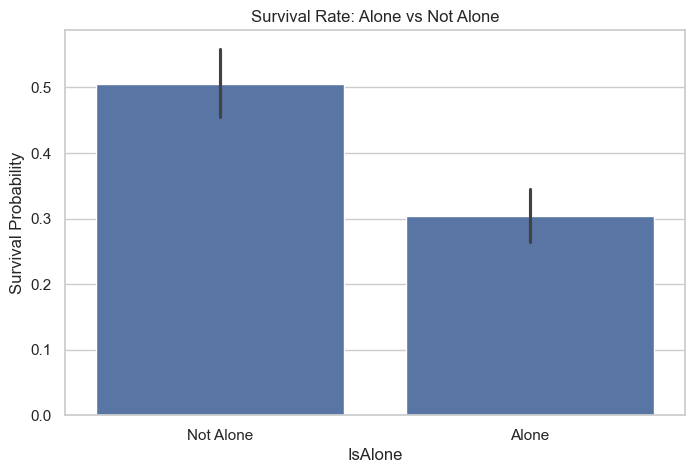

In [817]:
sns.barplot(x="IsAlone", y="Survived", data=train_df)
plt.title("Survival Rate: Alone vs Not Alone")
plt.xticks([0, 1], ["Not Alone", "Alone"])
plt.ylabel("Survival Probability")
plt.show()

Conclusion: Passengers traveling alone had lower survival.

In [818]:
train_df = pd.get_dummies(train_df, columns=["Embarked","Sex", "Deck"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["Embarked","Sex", "Deck"], drop_first=True)

In [819]:
train_df, test_df = train_df.align(
    test_df,
join="left",                
    axis=1,
    fill_value=0
)


In [820]:
test_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'FamilySize',
       'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Deck_UNKNOWN'],
      dtype='object')

#### Model Training

In [821]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [822]:
x= train_df.drop("Survived", axis=1)  
y = train_df["Survived"]

In [823]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
model = LogisticRegression(max_iter=1000)


In [824]:
model.fit(x_train,y_train)

c:\Users\Gayat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [825]:
y_pred = model.predict(x_test)


In [826]:
confusion_matrix(y_test, y_pred)

array([[91, 14],
       [18, 56]], dtype=int64)

In [827]:
from sklearn.ensemble import RandomForestClassifier


In [828]:
rf_model = RandomForestClassifier(
    n_estimators=300,      # number of trees
    max_depth=6,           # controls overfitting
    min_samples_split=5,   # prevents overly specific splits
    min_samples_leaf=2,    # smooths predictions
    random_state=42,
    n_jobs=-1              # use all CPU cores
)


In [829]:
rf_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [830]:
y_pred_rf=rf_model.predict(x_test)

In [831]:
confusion_matrix(y_test, y_pred_rf)

array([[93, 12],
       [20, 54]], dtype=int64)

In [832]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
print("Logistic Regression : ",accuracy)
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Logistic Regression :  0.8212290502793296
Random Forest Accuracy: 0.8212290502793296


Conclusion : Both Logistic Regression and Random Forest achieved the same accuracy of approximately 82.1% on the test set. Despite Random Forest being a more complex, non-linear model, it did not outperform Logistic Regression in this case. This indicates that, after effective feature engineering (such as Deck extraction, FamilySize, and IsAlone), the Titanic survival prediction problem becomes largely linearly separable. As a result, the simpler Logistic Regression model is sufficient to capture the underlying survival patterns.

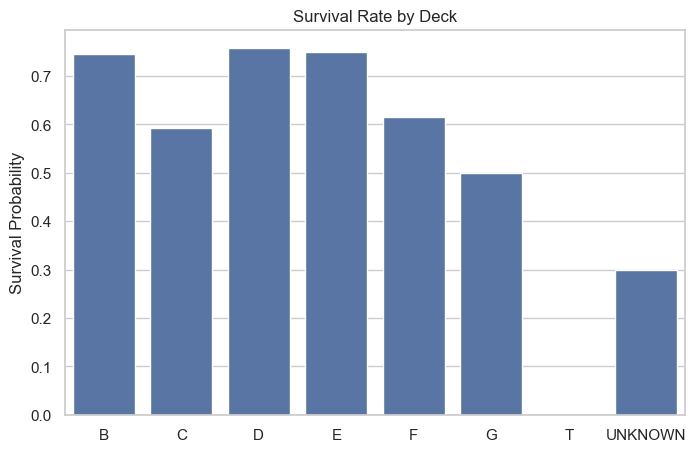

In [833]:
deck_cols = [c for c in train_df.columns if c.startswith("Deck_")]

deck_survival = {
    col.replace("Deck_", ""): train_df.loc[train_df[col] == 1, "Survived"].mean()
    for col in deck_cols
}



sns.barplot(
    x=list(deck_survival.keys()),
    y=list(deck_survival.values())
)
plt.title("Survival Rate by Deck")
plt.ylabel("Survival Probability")
plt.show()


Conclusion : Survival on the Titanic was shaped not only by cabin height but also by who occupied each deck and how quickly they could reach lifeboats.

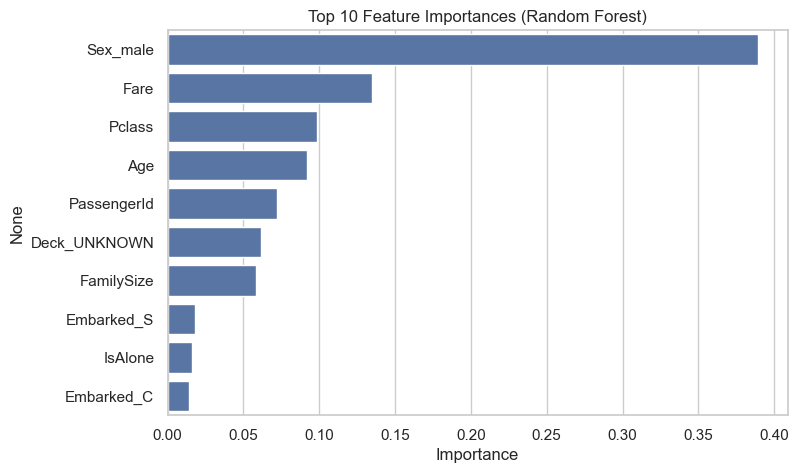

In [834]:
import pandas as pd

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.show()

In [835]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'FamilySize',
       'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Deck_UNKNOWN'],
      dtype='object')

In [836]:
test_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'FamilySize',
       'IsAlone', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Deck_UNKNOWN'],
      dtype='object')

In [837]:
test_df.drop(columns=['Survived'],axis=1,inplace=True)

In [838]:
test_predictions= model.predict(test_df)
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived":test_predictions
})

submission.to_csv("submission.csv", index=False)


Final Conclusion :
Exploratory analysis showed survival depended mainly on gender, class, deck location, and family structure. Feature engineering significantly improved predictions. Both Logistic Regression and Random Forest achieved ~82% accuracy, indicating the problem is largely linearly separable and that simple, interpretable models can perform as effectively as complex ones.